# Optimización de funciones

## ¿Qué es la optimización?

### Encontrar máximos y/o mínimos

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Max_paraboloid.svg/1200px-Max_paraboloid.svg.png)
Fuente: wikipedia

![](http://www.disfrutalasmatematicas.com/calculo/images/function-max.svg)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bracket, minimize

In [2]:
def f(x):
    return 10*x**2 + 3*x + 5

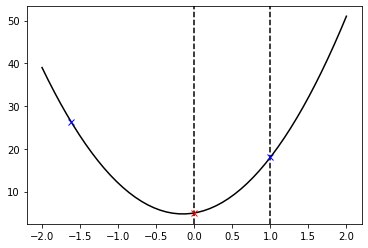

In [3]:
x = np.linspace(-2, 2)
y = f(x)

init_xa = 0
init_xb = 1
xa, xb, xc, fa, fb, fc, funcalls = bracket(f, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")

plt.show()

## Ejercicio, mover xa y xb

In [4]:
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

In [5]:
def f(x):
    '''Objective function'''
    return 0.5*x[0]**2 + 2.5*x[1]**2 + 4 * x[0] * np.sin(np.pi * x[0]) + 5

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] + 4 * np.sin(np.pi * x[0]) + 4 * np.pi * x[0] * np.cos(np.pi * x[0]), 5*x[1]])

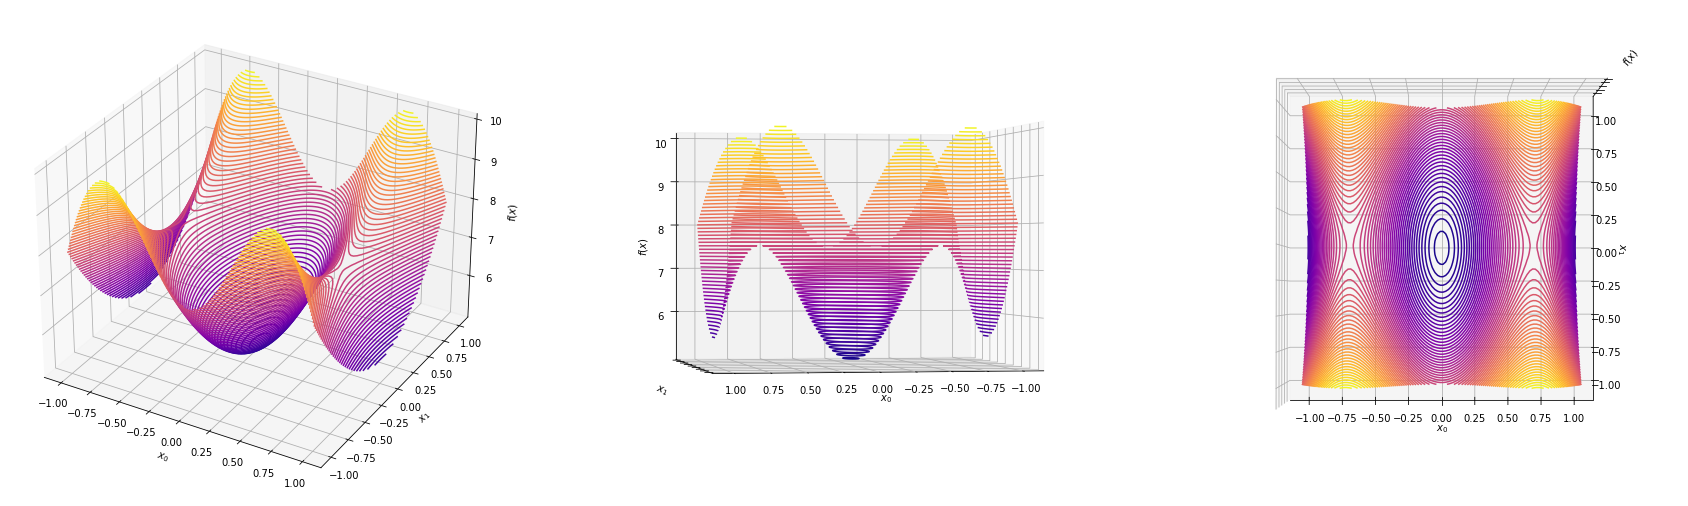

In [6]:
# Generate data
X0, X1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = f(np.stack([X0, X1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

In [7]:
# Starting point
x_start = np.array([0.2, 0.2])
# x_start = np.array([0.5, 0.5])

lim = [0.25, 0.30, 0.75, 0.8]

bounds = Bounds([lim[0], lim[1]],  # [min x0, min x1]
                [lim[2], lim[3]])  # [max x0, max x1]

# Optimization
result = minimize(f, x0=x_start, method='L-BFGS-B', jac=df, bounds=None)

result.x.round(3)

array([-0., -0.])

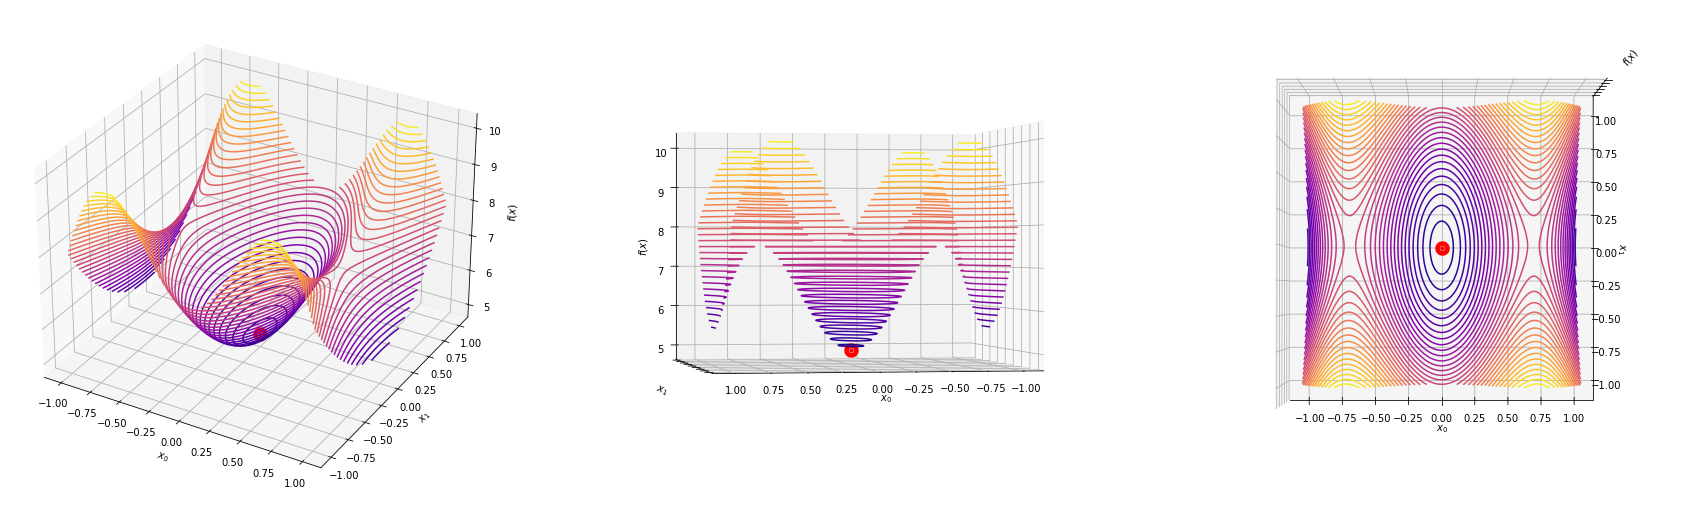

In [8]:
# Minimum from unconstrained optimization
min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])   
min_z = f(np.stack([min_x0, min_x1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90)

## Ejercicio: Hacer dos variaciones en las fronteras (bounds) y en la suposición inicial x0

## Algunas desventajas de los métodos de scipy.optimize

- Sensibles a las condiciones iniciales.
- Se atascan en máximos locales.
- Algunos requieren cálculo de derivadas.
- Algunos calculan segundas derivadas.
- Tienen problemas con altas dimensiones, se deben calcular hessianos.

## ¿Para qué sirve la optimización?

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*44DntoT9xYkMzrSrDWlrxw.jpeg)
Fuente: https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8

## Utilidad en Aprendizaje Automático

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*w1LDt6OfwKdVLWrN8d69Gg.png)
Fuente: https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8